# Converting shapefiles (.shp) to ASCII (coordinates of polygons)
*by Hagen Radtke, 2020-06-25*

## Read in the shapefile

The shapefile is saved in the subfolder `my_folder`. It consists of several files with different file extensions.
We will read it using the R library `rgdal`.

In [1]:
setwd("/silos/notebook_collection/converting_files/shapefile_ascii_polygons/")
library("rgdal")
shape = rgdal::readOGR("my_folder","IPCC_regions_Aug2013")

Loading required package: sp
rgdal: version: 1.5-10, (SVN revision 1006)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 2.3.3, released 2018/12/14
Path to GDAL shared files: /silos/conda_packages/radtke/miniconda3_4.8.2/OS_42.3/conda_env/iow_python/share/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 5.2.0, September 15th, 2018, [PJ_VERSION: 520]
Path to PROJ shared files: /sw/data/python/miniconda3/4.8.2/OS_42.3/envs/iow_r_basic/share/proj
Linking to sp version:1.3-1


OGR data source with driver: ESRI Shapefile 
Source: "/silos/notebook_collection/converting_files/shapefile_ascii_polygons/my_folder", layer: "IPCC_regions_Aug2013"
with 18 features
It has 2 fields


See how many polygon groups we have

In [2]:
length(shape@polygons)

[1] 18

How many polygons are in the first group?

In [3]:
polygroup = shape@polygons[[1]]@Polygons
length(polygroup)

[1] 48

Let us get the coordinates of the first one

In [4]:
mypoly = polygroup[[1]]
mypoly@coords

6.330034,59.16339
6.021625,59.16339
6.051108,59.19147
6.102592,59.22318
6.116350,59.22999
6.330034,59.28988
6.330034,59.16339


We want to merge all coordinates to a large data.frame, so we will need two nested loops

In [5]:
# start with empty data
all_coordinates = NULL

# we will count the polygons
polygon_num = 1

# loop over polygon groups
for (i in seq_along(shape@polygons)) {
    polygroup = shape@polygons[[i]]@Polygons
    # loop over polygons in the group
    for (j in seq_along(polygroup)) {
        mypoly = polygroup[[j]]
        # save coordinates to data.frame
        my_coordinates = data.frame(lon=mypoly@coords[,1],lat=mypoly@coords[,2])
        # add group and polygon number
        my_coordinates$group_num = i
        my_coordinates$polygon_num = polygon_num
        # append to complete list
        all_coordinates = rbind(all_coordinates, my_coordinates)
        polygon_num = polygon_num + 1
    }
}

See how many points we have

In [6]:
dim(all_coordinates)

[1] 40992     4

We can plot them:

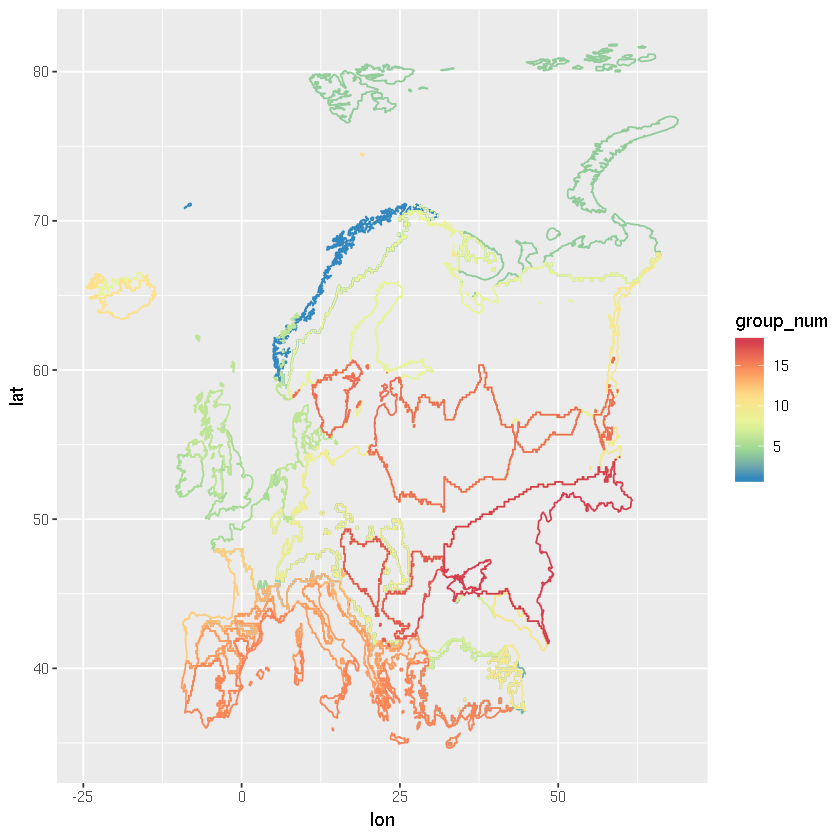

In [18]:
library("ggplot2")
ggplot(all_coordinates, aes(x=lon,y=lat,color=group_num, group=polygon_num))+
   geom_path()+
   scale_color_distiller(palette = "Spectral")

Save them to a csv file with ";" as separator

In [8]:
write.table(all_coordinates, file="polygons.txt", row.names=FALSE, sep=";")

Then use a system command to see whether that worked

In [9]:
system("head polygons.txt", intern=TRUE)

[1] "\"lon\";\"lat\";\"group_num\";\"polygon_num\""
 [2] "6.33003353291554;59.1633853250548;1;1"        
 [3] "6.02162529556222;59.1633853250547;1;1"        
 [4] "6.051107531741;59.1914706351336;1;1"          
 [5] "6.10259202268288;59.2231816802383;1;1"        
 [6] "6.11634954461583;59.2299901789748;1;1"        
 [7] "6.33003353291554;59.2898844035391;1;1"        
 [8] "6.33003353291554;59.1633853250548;1;1"        
 [9] "6.33003353291554;59.3013124467066;1;2"        
[10] "6.2627365770635;59.2885901715442;1;2"